# Production companies and production countries

Production houses are indispensable to the film industry and help take care of processes involved in e.g. funding, advertising, and screening. Most people are familiar with the famous production houses like 20th Century Studios, Warner Brothers, Paramount Pictures, Universal Pictures, and Lionsgate Films. This notebook is devoted to gain insight on the production houses involved with the different movies. In addition, the production country is scrutinised to see whether it is correlated with the production companies. To this, we aggregated performances of different production companies and production countries and compared features such as their budget, revenue, popularity.

In [1]:
import sys
import os
from tqdm import tqdm
import numpy as np

sys.path.insert(0, os.path.abspath('../utils/')) #point this to the where util is relatively to your working directory

from util import *
from util import get_averages_for_columns
%matplotlib inline


data_dir = get_path_to_data_dir()
plot_dir = get_path_to_plot_dir()

In [2]:
# Load the unaggregated dataset
movie_details_neat = pd.read_pickle(data_dir + 'pre-processed/movie_details_neat.pkl')
movie_details_neat.head(3)

,budget,id,popularity,revenue,runtime,vote_average,vote_count,genres,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,movie_id,cast,crew
0,105000000,64682,61.196071,351040419,143.0,7.3,3769,"{'id': [18, 10749], 'name': ['Drama', 'Romance']}","{'id': [818, 1326, 1523, 3929, 209714], 'name'...",en,The Great Gatsby,An adaptation of F. Scott Fitzgerald's Long Is...,"{'name': ['Village Roadshow Pictures', 'Bazmar...","{'iso_3166_1': ['US', 'AU'], 'name': ['United ...",2013-05-10,"{'iso_639_1': ['en'], 'name': ['English']}",64682,"{'cast_id': [2, 5, 3, 8, 6, 4, 7, 22, 13, 23, ...","{'credit_id': ['52fe46e3c3a368484e0a982d', '52..."
1,150000000,9543,62.169881,335154643,116.0,6.2,2317,"{'id': [12, 14, 28, 10749], 'name': ['Adventur...","{'id': [1241, 1965, 12653, 12654, 12655, 41645...",en,Prince of Persia: The Sands of Time,A rogue prince reluctantly joins forces with a...,"{'name': ['Walt Disney Pictures', 'Jerry Bruck...","{'iso_3166_1': ['US'], 'name': ['United States...",2010-05-19,"{'iso_639_1': ['en'], 'name': ['English']}",9543,"{'cast_id': [5, 2, 7, 4, 6, 8, 9, 10, 26, 27, ...","{'credit_id': ['567e74d4c3a36860e9008e46', '52..."
2,140000000,5174,22.571780,258022233,91.0,6.1,783,"{'id': [28, 35, 80, 53], 'name': ['Action', 'C...","{'id': [1704], 'name': ['ambassador']}",en,Rush Hour 3,After an attempted assassination on Ambassador...,"{'name': ['New Line Cinema'], 'id': [12]}","{'iso_3166_1': ['US'], 'name': ['United States...",2007-08-08,"{'iso_639_1': ['la', 'en', 'fr', 'ja', 'zh'], ...",5174,"{'cast_id': [2, 3, 4, 5, 6, 7, 8, 9, 26, 27, 2...","{'credit_id': ['52fe43fac3a36847f807b5bd', '52..."


In [3]:
# We load up a dictionary with all the production countries
with open(data_dir + 'pre-processed/id_maps.json', 'r') as f:
    id_maps = json.load(f)

def list_category(id_maps, column_name):
    return list(id_maps[column_name].values())

# Complete list of production countries
list_category(id_maps, 'production_countries')

['United States of America',
 'Australia',
 'Germany',
 'Belgium',
 'India',
 'Japan',
 'United Kingdom',
 'Canada',
 'Italy',
 'Spain',
 'China',
 'New Zealand',
 'France',
 'Hong Kong',
 'Ireland',
 'Morocco',
 'Hungary',
 'Singapore',
 'Norway',
 'Sweden',
 'South Africa',
 'Russia',
 'Romania',
 'Mexico',
 'Czech Republic',
 'Monaco',
 'Switzerland',
 'Pakistan',
 'Malaysia',
 'Finland',
 'Iceland',
 'Denmark',
 'Tunisia',
 'Philippines',
 'United Arab Emirates',
 'Bulgaria',
 'Malta',
 'South Korea',
 'Brazil',
 'Peru',
 'Netherlands',
 'Luxembourg',
 'Bosnia and Herzegovina',
 'Kazakhstan',
 'Portugal',
 'Poland',
 'Aruba',
 'Libyan Arab Jamahiriya',
 'Serbia',
 'Ukraine',
 'Chile',
 'Argentina',
 'Panama',
 'Austria',
 'Greece',
 'Taiwan',
 'Lithuania',
 'Thailand',
 'Slovakia',
 'Israel',
 'Fiji',
 'Serbia and Montenegro',
 'Bahamas',
 'Turkey',
 'Nigeria',
 'Cyprus',
 'Jordan',
 'Bolivia',
 'Ecuador',
 'Colombia',
 'Egypt',
 'Bhutan',
 'Lebanon',
 'Indonesia',
 'Jamaica',
 'Gu

### Testing the `get_averages_for_columns()` function
This function generates the average values on the categories in the columns.

        Args:
                df: the dataframe
                id_maps: collection of maps from ids to category for different columns
                id_key_name: the actual key to the ids. e.g. 'id', 'crew_id', 'cast_id'
                column_name: name of the column to query. e.g. genres
                save: if True it will save the file to the data/pre-processed directory.
		save_dir: location to save the generated DataFrame.

        Returns:
                Dataframe aggregated by the chosen column.

In [4]:
# Aggregate the movie by production company
prod_companies = get_averages_for_columns(movie_details_neat, id_maps, 'id', 
                                          'production_companies', True, data_dir+'pre-processed/')

100%|██████████| 4741/4741 [10:59<00:00,  7.27it/s]


In [5]:
len(prod_companies)

4741

In [6]:
# Aggregate the dataset by production country
prod_countries = get_averages_for_columns(movie_details_neat, id_maps, 'iso_3166_1', 
                                          'production_countries', True, data_dir+'pre-processed/')

100%|██████████| 80/80 [00:11<00:00,  7.00it/s]


In [7]:
prod_countries.head()

,id,budget,popularity,revenue,runtime,vote_average,vote_count,appearances
0,United States of America,2.772917e+07,19.779870,6.683584e+07,106.019537,6.121183,564.818030,3583
1,Australia,3.665069e+07,18.900742,7.283648e+07,103.904762,5.953333,506.485714,105
2,Germany,3.426556e+07,19.953543,6.254639e+07,111.121311,6.232787,566.980328,305
3,Belgium,1.982165e+07,13.927995,2.392685e+07,104.500000,6.366667,252.541667,24
4,India,2.050000e+07,12.072710,5.088223e+07,123.772727,6.156818,411.840909,44


In [8]:
prod_companies.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,appearances
count,4.741000e+03,4741.000000,4.741000e+03,4741.000000,4741.000000,4741.000000,4741.000000
mean,2.250971e+07,18.478442,4.843291e+07,107.080984,6.224094,501.616981,2.632567
std,2.676551e+07,16.437388,7.236547e+07,15.947909,0.868265,630.795972,9.866856
min,0.000000e+00,0.008453,0.000000e+00,41.000000,2.700000,1.000000,1.000000
25%,2.080000e+06,6.169125,7.920000e+02,96.000000,5.750000,77.000000,1.000000
50%,1.300000e+07,14.033065,1.774253e+07,105.000000,6.300000,273.666667,1.000000
75%,3.300000e+07,26.023778,6.836849e+07,116.000000,6.800000,672.500000,2.000000
max,1.500000e+08,116.700319,5.463881e+08,174.000000,9.300000,4369.000000,281.000000


In [9]:
prod_countries.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,appearances
count,8.000000e+01,80.000000,8.000000e+01,80.000000,80.000000,80.000000,80.000000
mean,1.962783e+07,14.883277,3.264814e+07,110.446586,6.210856,353.994944,73.350000
std,1.818128e+07,10.905506,3.768346e+07,14.256133,0.819173,309.368583,405.801757
min,0.000000e+00,0.025211,0.000000e+00,83.000000,2.800000,2.000000,1.000000
25%,4.818750e+06,7.527147,1.932542e+05,102.312500,5.986738,107.000000,1.000000
50%,1.669322e+07,13.890288,2.180435e+07,109.944444,6.341176,320.750000,3.500000
75%,2.643229e+07,19.423384,5.458768e+07,116.193510,6.657857,500.985835,18.250000
max,7.500000e+07,54.814890,2.032776e+08,173.000000,7.800000,1584.000000,3583.000000


In [10]:
# Select all production houses that appear more than ten times
# i.e. have helped produce more than 10 movies
prod_companies_pop = prod_companies[prod_companies['appearances'] > 2]
prod_companies_pop.head()

,id,budget,popularity,revenue,runtime,vote_average,vote_count,appearances
0,Village Roadshow Pictures,6.050704e+07,28.754815,1.303950e+08,108.126761,5.914085,969.943662,71
1,Bazmark Films,7.550000e+07,47.226113,1.817767e+08,138.750000,6.925000,1784.250000,4
2,Warner Bros.,4.518166e+07,25.835690,1.030195e+08,113.666667,6.252381,819.864469,273
4,Red Wagon Entertainment,8.740000e+07,58.792163,1.844831e+08,127.000000,6.720000,2216.400000,5
6,Walt Disney Pictures,5.139402e+07,25.185501,1.228373e+08,98.885057,6.133333,666.747126,87


In [11]:
prod_companies_pop.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,appearances
count,7.760000e+02,776.000000,7.760000e+02,776.000000,776.000000,776.000000,776.000000
mean,3.237169e+07,23.776206,7.584368e+07,108.818227,6.256350,710.805548,10.184278
std,2.308496e+07,12.128248,6.694809e+07,10.981090,0.501858,516.125171,22.945339
min,0.000000e+00,1.269261,0.000000e+00,75.250000,4.066667,14.333333,3.000000
25%,1.366667e+07,14.724189,2.452074e+07,101.666667,5.933333,318.000000,3.000000
50%,2.892708e+07,22.115698,5.767131e+07,107.845238,6.292857,611.100000,5.000000
75%,4.674167e+07,30.953768,1.066057e+08,114.616667,6.575000,960.300000,8.000000
max,1.100000e+08,81.189652,4.408696e+08,151.333333,7.966667,3350.666667,281.000000


# Top 5 - ranking production houses based on average budget, revenue, popularity, runtime, and more, across the movies they have helped produce

In [12]:
# The five production houses with the highest average budget
prod_companies_pop.nlargest(5, ['budget'])

,id,budget,popularity,revenue,runtime,vote_average,vote_count,appearances
379,Pixar Animation Studios,1.100000e+08,81.189652,4.408696e+08,101.333333,6.9000,3328.666667,3
53,Walt Disney Animation Studios,1.087500e+08,33.957943,1.576196e+08,86.500000,6.3250,863.500000,4
157,Walt Disney Feature Animation,1.078125e+08,48.380295,2.412265e+08,85.625000,6.7875,1240.875000,8
40,Moving Picture Company (MPC),1.071250e+08,58.897455,1.840042e+08,104.625000,5.7125,1513.875000,8
108,TIK Films,1.066667e+08,53.468325,2.108397e+08,120.666667,5.9000,1942.666667,3


Some of these production houses are familiar, particularly DreamWorks Animation and Marvel Enterprises. E.g. for the latter, the huge budget is hardly surprising given that comic book based movies have historically had very large budgets.

In [13]:
# The five production houses with the highest average revenue
prod_companies_pop.nlargest(5, ['revenue'])

,id,budget,popularity,revenue,runtime,vote_average,vote_count,appearances
379,Pixar Animation Studios,1.100000e+08,81.189652,4.408696e+08,101.333333,6.900000,3328.666667,3
160,Blue Sky Studios,8.766667e+07,48.123314,3.572397e+08,93.333333,6.466667,1676.500000,6
247,Kerner Entertainment Company,1.000000e+08,27.753477,3.517278e+08,101.666667,5.600000,720.666667,3
64,Pacific Data Images (PDI),9.214286e+07,44.059230,3.514324e+08,87.857143,6.342857,1887.142857,7
394,Bagdasarian Productions,4.500000e+07,34.871888,3.460874e+08,90.666667,5.566667,757.000000,3


In [14]:
# The five production houses with the highest average popularity
prod_companies_pop.nlargest(5, ['popularity'])

,id,budget,popularity,revenue,runtime,vote_average,vote_count,appearances
379,Pixar Animation Studios,1.100000e+08,81.189652,4.408696e+08,101.333333,6.900000,3328.666667,3
192,Genre Films,7.920000e+07,78.804012,2.477307e+08,107.600000,6.100000,2474.400000,5
681,Fuji Television Network,3.666667e+07,64.512516,1.533051e+08,102.000000,5.666667,1517.666667,3
234,NeoReel,1.016667e+08,62.934680,2.632031e+08,110.000000,5.800000,1946.666667,3
85,LStar Capital,5.290000e+07,60.000144,1.309338e+08,110.200000,6.050000,1843.700000,10


In [15]:
# The five production houses that produces the longest movies, on average
prod_companies_pop.nlargest(5, ['runtime'])

,id,budget,popularity,revenue,runtime,vote_average,vote_count,appearances
398,Stanley Kubrick Productions,5.850000e+07,49.368870,1.555726e+08,151.333333,7.266667,2068.666667,3
826,Ixtlan,3.800000e+07,26.977809,1.147329e+08,146.333333,6.566667,527.666667,3
1151,Rai Cinema,2.111325e+07,16.396355,3.383491e+07,145.333333,6.966667,400.000000,3
237,Forward Pass,8.520000e+07,35.683508,9.616121e+07,142.000000,6.480000,930.600000,5
414,First Light Production,5.166667e+07,33.646355,6.999656e+07,142.000000,6.666667,1268.666667,3


In [16]:
# The five production houses that produce the shortest movies, on average
prod_companies_pop.nsmallest(5, ['runtime'])

,id,budget,popularity,revenue,runtime,vote_average,vote_count,appearances
2167,Walt Disney Television Animation,1.500000e+07,10.558639,7.250088e+07,75.250000,5.950000,157.000000,4
1407,Starz Animation,2.233333e+07,21.299913,3.740947e+07,81.666667,5.900000,462.000000,3
2474,SNL Studios,1.366667e+07,6.338591,1.467706e+07,82.000000,5.566667,105.000000,3
650,Joseph M. Singer Entertainment,7.033333e+07,14.599347,1.568536e+08,83.000000,4.700000,381.333333,3
4038,Silver Nitrate Films,0.000000e+00,4.238618,0.000000e+00,84.666667,4.066667,52.666667,3


In [17]:
# The five production houses that produce movies with highest vote averages, on average
prod_companies_pop.nlargest(5, ['vote_count'])

,id,budget,popularity,revenue,runtime,vote_average,vote_count,appearances
44,Bad Hat Harry Productions,8.933333e+07,22.051050,2.860287e+08,116.166667,6.816667,3350.666667,6
379,Pixar Animation Studios,1.100000e+08,81.189652,4.408696e+08,101.333333,6.900000,3328.666667,3
33,Plan B Entertainment,1.000000e+08,48.711620,3.231367e+08,133.000000,6.800000,2866.333333,3
423,Hypnotic,7.333333e+07,53.636249,2.415885e+08,105.000000,6.800000,2735.666667,3
202,Marvel Entertainment,9.900000e+07,34.233939,2.442119e+08,107.000000,5.133333,2488.666667,3


In [18]:
# The five production houses that, on average, have the highest number of vote on their movies
prod_companies_pop.nlargest(5, ['vote_count'])

,id,budget,popularity,revenue,runtime,vote_average,vote_count,appearances
44,Bad Hat Harry Productions,8.933333e+07,22.051050,2.860287e+08,116.166667,6.816667,3350.666667,6
379,Pixar Animation Studios,1.100000e+08,81.189652,4.408696e+08,101.333333,6.900000,3328.666667,3
33,Plan B Entertainment,1.000000e+08,48.711620,3.231367e+08,133.000000,6.800000,2866.333333,3
423,Hypnotic,7.333333e+07,53.636249,2.415885e+08,105.000000,6.800000,2735.666667,3
202,Marvel Entertainment,9.900000e+07,34.233939,2.442119e+08,107.000000,5.133333,2488.666667,3


In [19]:
# The five production houses that appear the most in the data
prod_companies_pop.nlargest(5, ['appearances'])

,id,budget,popularity,revenue,runtime,vote_average,vote_count,appearances
9,Universal Pictures,3.901198e+07,25.515336,1.034093e+08,111.256228,6.227758,792.967972,281
2,Warner Bros.,4.518166e+07,25.835690,1.030195e+08,113.666667,6.252381,819.864469,273
26,Paramount Pictures,3.763521e+07,22.140408,9.635208e+07,108.339844,6.161719,627.570312,256
35,Twentieth Century Fox Film Corporation,4.248594e+07,26.318939,1.252882e+08,106.939698,6.108040,887.356784,199
49,Columbia Pictures,4.559268e+07,26.943474,1.013324e+08,108.883978,6.146409,830.132597,181


# Production houses vs. production countries - are they correlated?

A lot of production houses do most of their movies in a specific country. This prompts the question of whether production houses and production countries are correlated and thus whether 

In [20]:
# Load dataset where production countries and production houses have been transformed using OHE
movie_details_numeric = pd.read_pickle(data_dir + 'pre-processed/movie_encoded_only_numeric.pkl')

# Pick only production companies with more than 50 appearances
list_production_companies = prod_companies[prod_companies['appearances'] > 50]['id'].tolist()
list_production_countries = prod_countries[prod_countries['appearances'] > 50]['id'].tolist()

list_companies_and_countries = list_production_companies + list_production_countries

production_countries_and_companies = movie_details_numeric[list_companies_and_countries]

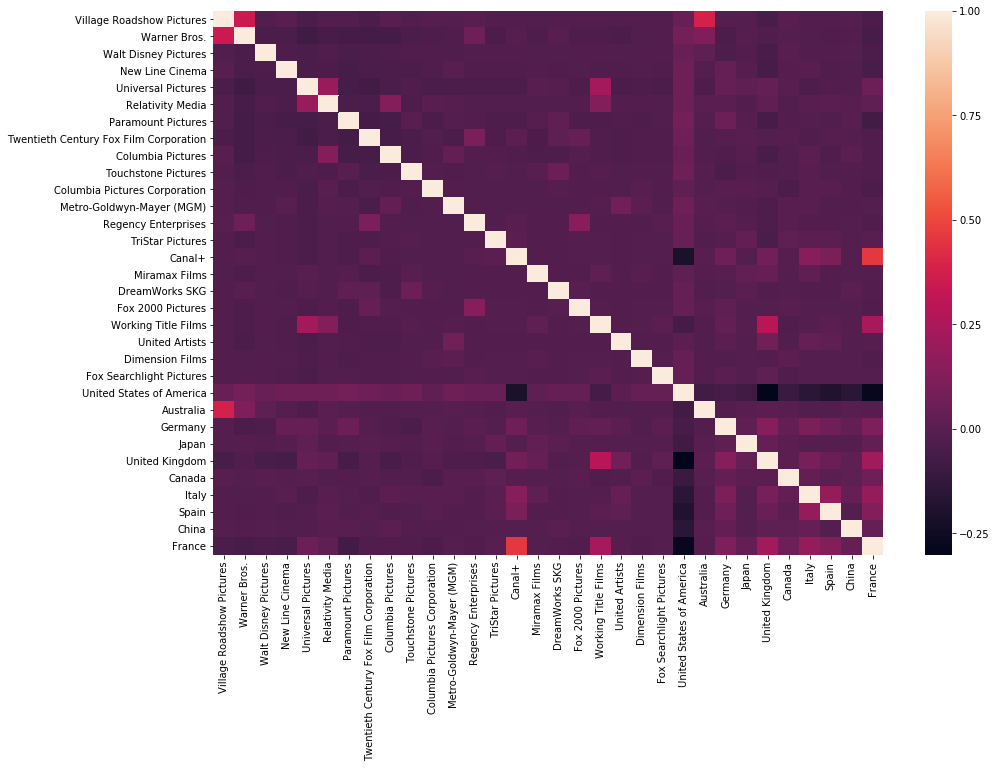

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute and plot the correlations
corr_country_company = production_countries_and_companies.corr()
fig = plt.figure(figsize=(15,10))
sns.heatmap(corr_country_company)
plt.savefig(plot_dir+"corrmatrix_productionhouses-vs-productioncountries.png")

The key takeaway here is that the production countries and production companies are uncorrelated, which suggests that both the production company and production country should be included in any prediction model.  